In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import keras
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Reshape
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [4]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

X_train = np.divide(X_train,255.).reshape((len(X_train),28*28))
X_test = np.divide(X_test,255.).reshape((len(X_test),28*28))

y_temp = list()
for i in range(y_train.shape[0]):
    temp = np.zeros((10,))
    temp[y_train[i]] = 1.
    y_temp.append(temp)
y_train = np.array(y_temp)

y_temp = list()
for i in range(y_test.shape[0]):
    temp = np.zeros((10,))
    temp[y_test[i]] = 1.
    y_temp.append(temp)
y_test = np.array(y_temp)

del y_temp

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [5]:
input_vector = Input(shape=(784,))
print('input_vector', input_vector.shape)

attention_probs = Dense(784, activation='softmax')(input_vector)
print('\nattention_probs',attention_probs.shape)
attention_mul = keras.layers.multiply([input_vector, attention_probs])
print('attention_mul',attention_mul.shape)

dense = Dense(512,activation='relu')(attention_mul)
dense = Dense(512,activation='relu')(attention_mul)

output_class = Dense(10, activation='softmax')(dense)
print('\noutput_class',output_class.shape)

input_vector (?, 784)

attention_probs (?, 784)
attention_mul (?, 784)

output_class (?, 10)


In [6]:
model = Model(input_vector,output_class)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 784)          615440      input_1[0][0]                    
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 784)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 512)          401920      multiply_1[0][0]                 
__________

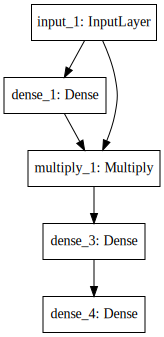

In [7]:
print(model.summary())
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [8]:
history = model.fit(X_train,y_train,batch_size=1024,epochs=100,verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 4s 75us/step - loss: 2.1810 - acc: 0.3929 - val_loss: 1.7138 - val_acc: 0.7420
Epoch 2/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.9463 - acc: 0.8039 - val_loss: 0.3946 - val_acc: 0.8982
Epoch 3/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.3844 - acc: 0.8958 - val_loss: 0.2537 - val_acc: 0.9308
Epoch 4/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.2889 - acc: 0.9212 - val_loss: 0.2140 - val_acc: 0.9420
Epoch 5/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.2476 - acc: 0.9319 - val_loss: 0.1925 - val_acc: 0.9485
Epoch 6/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.2190 - acc: 0.9394 - val_loss: 0.1778 - val_acc: 0.9527
Epoch 7/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.1988 - acc: 0.9447 - val_loss: 0.1685 - val_acc

54000/54000 [==============================] - 0s 9us/step - loss: 0.0146 - acc: 0.9966 - val_loss: 0.1872 - val_acc: 0.9630
Epoch 61/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0136 - acc: 0.9970 - val_loss: 0.1892 - val_acc: 0.9630
Epoch 62/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0128 - acc: 0.9972 - val_loss: 0.1893 - val_acc: 0.9640
Epoch 63/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.1907 - val_acc: 0.9630
Epoch 64/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0116 - acc: 0.9976 - val_loss: 0.1909 - val_acc: 0.9630
Epoch 65/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0107 - acc: 0.9977 - val_loss: 0.1955 - val_acc: 0.9643
Epoch 66/100
54000/54000 [==============================] - 0s 9us/step - loss: 0.0102 - acc: 0.9979 - val_loss: 0.1953 - val_acc: 0.9635
Epoch 67/100
54000/54000 [=====================

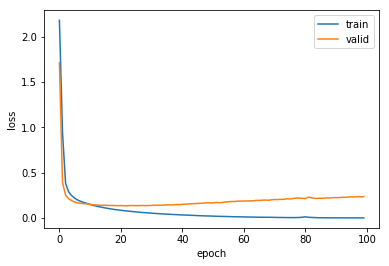

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'])
plt.show()

In [10]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(10000, 10)


In [11]:
print('acc')
acc = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        acc += 1
        
print(acc / len(y_pred))

acc
0.9621


In [33]:
attention_model = Model(input_vector, attention_probs)

In [34]:
y_att = attention_model.predict(X_test)

7 7


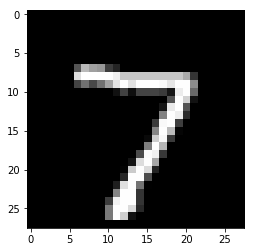

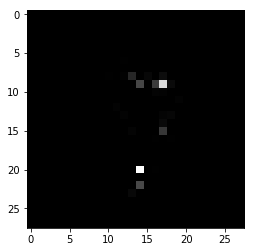

2 2


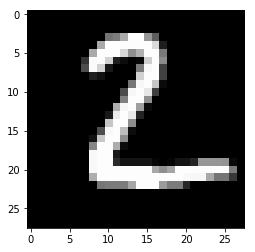

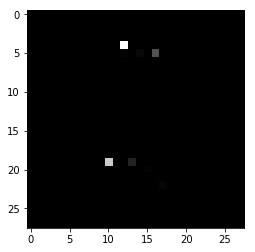

1 1


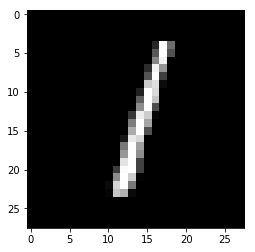

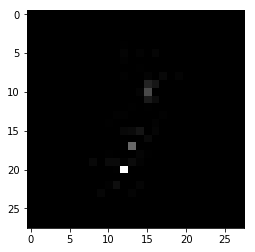

0 0


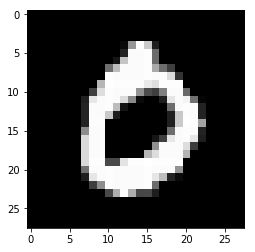

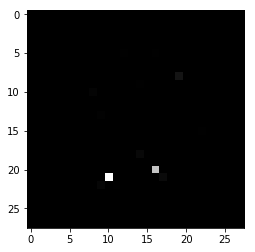

4 4


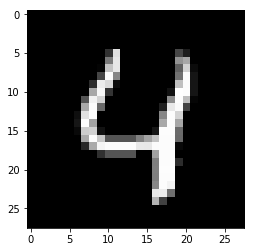

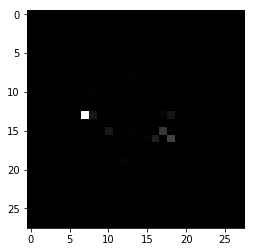

1 1


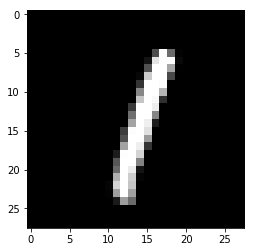

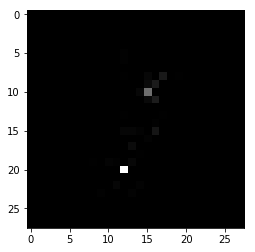

4 4


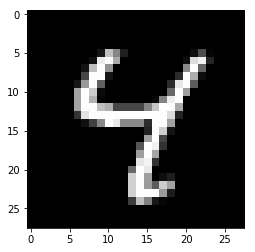

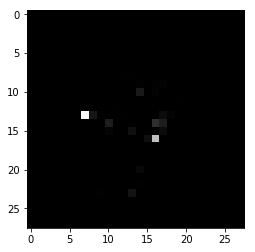

9 9


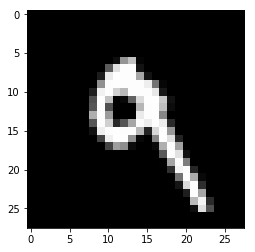

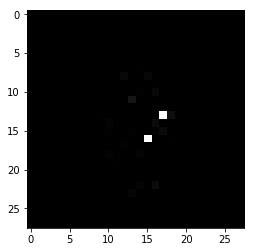

5 5


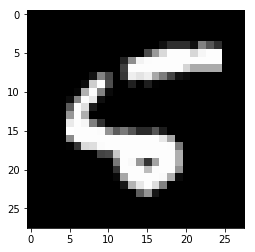

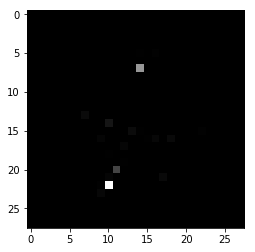

9 9


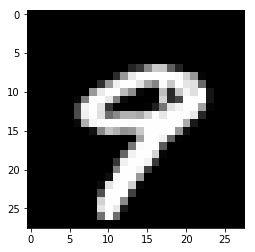

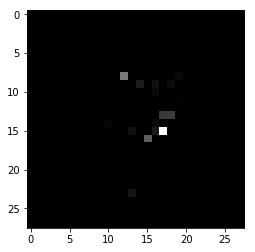

In [48]:
for i in range(10):
    print(np.argmax(y_pred[i]), np.argmax(y_test[i]))
    plt.imshow(X_test[i].reshape((28,28)), interpolation='nearest',cmap='gray')
    plt.show()

    plt.imshow(y_att[i].reshape((28,28)),cmap='gray')
    plt.show()